In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
#to keep dataset simple we has to drop some columns

In [8]:
df2 = df1.drop(['area_type','society','availability','balcony'], axis =1)
df2.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [ ]:
#data cleaning

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#as dataset is large, we can drop NA values row

In [10]:
df3 = df2.dropna()

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#as values are not regular in 'size' column

In [13]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

<ipython-input-13-11ea72ac09fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [15]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [ ]:
#now just examine total_sqft column

In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#here we have some range like 1133 - 1384, we will replace this by taking average

In [ ]:
#checking other value problem in total_sqft column

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [ ]:
#only problem we has that some values are given in ranges 

In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df4['total_sqft'].loc[122]

5611.5

In [ ]:
#feature engineering

In [ ]:
#now I am creating new column "price_per_sqft", this column will help us in Outlier removal.

In [28]:
df5 = df4.copy()

df5["price_per_sqft"] = (df5['price']*100000) / df5['total_sqft']

df5.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [29]:
df5.location = df5.location.apply(lambda x: x.strip())

In [31]:
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [ ]:
#so many location contain only one data points

In [32]:
location_stats.sort_values(ascending = False)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [ ]:
#as so many location has 1 datapoint, we set a threshold that location containing less than 10 datapoint called location as 'Other'

In [33]:
len(location_stats[location_stats<=10])

1052

In [35]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
df5.location = df5.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)

In [ ]:
#Outlier Removal

In [ ]:
#1st may be bedroom size given in dataset can be less than 300 square feet. which we are expecting it is invalid

In [42]:
df5[df5.total_sqft/df5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [ ]:
#removing all this above row

In [43]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [44]:
df6[df6.total_sqft/df6.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [ ]:
#now check price_per_sqft

In [45]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#as min price_per_sqft is 267.82rs which is not valid for banglore like location. similarly for max price_per_sqft

In [59]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft <= (m + std)) ]
        
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outlier(df6)

In [ ]:
#now for same location, 3bhk, 1210 sqft, price = 81 lac and 2bhk, 1210 sqft, price = 1cr 21lac which is invalid
#so we can visualized it

In [89]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


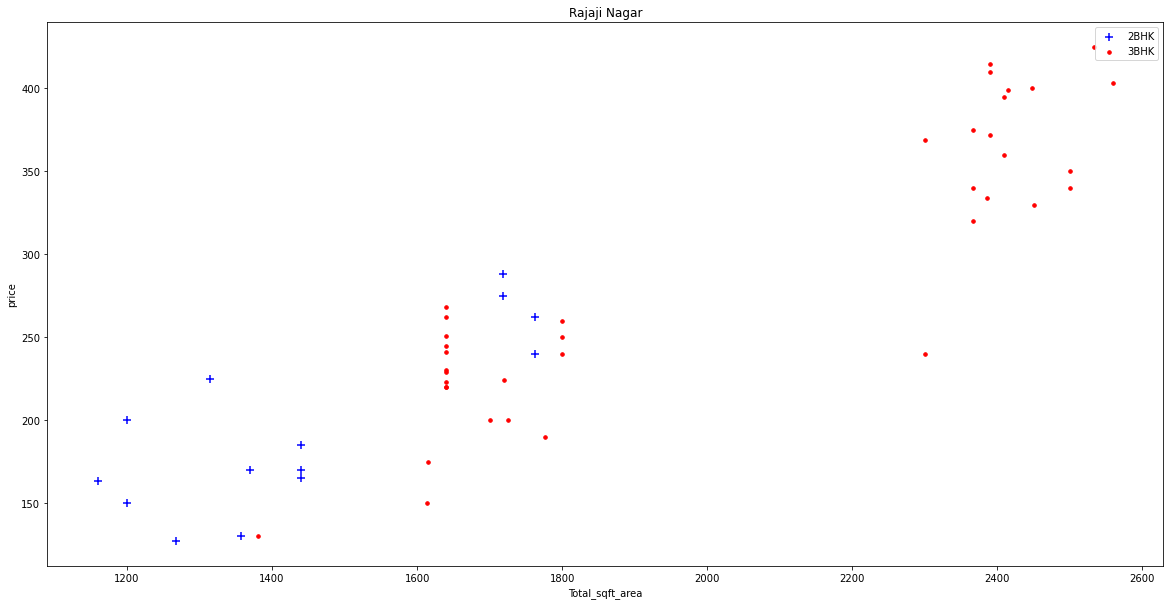

In [97]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    
    plt.scatter(bhk2.total_sqft,bhk2.price, color = 'blue', label = '2BHK', marker = '+',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color = 'red', label = '3BHK', marker = '.',s=50)
    


    
    plt.xlabel('Total_sqft_area')
    plt.ylabel('price')
    plt.title(location)
    
    plt.legend()



plot_scatter_chart(df7, "Rajaji Nagar")
   

    

In [ ]:
#remove those 3bhk apartment whose price is less than 2bhk apartment price

In [110]:
df7.shape

(10241, 7)

In [111]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outlier(df7)
df8.shape

(7329, 7)

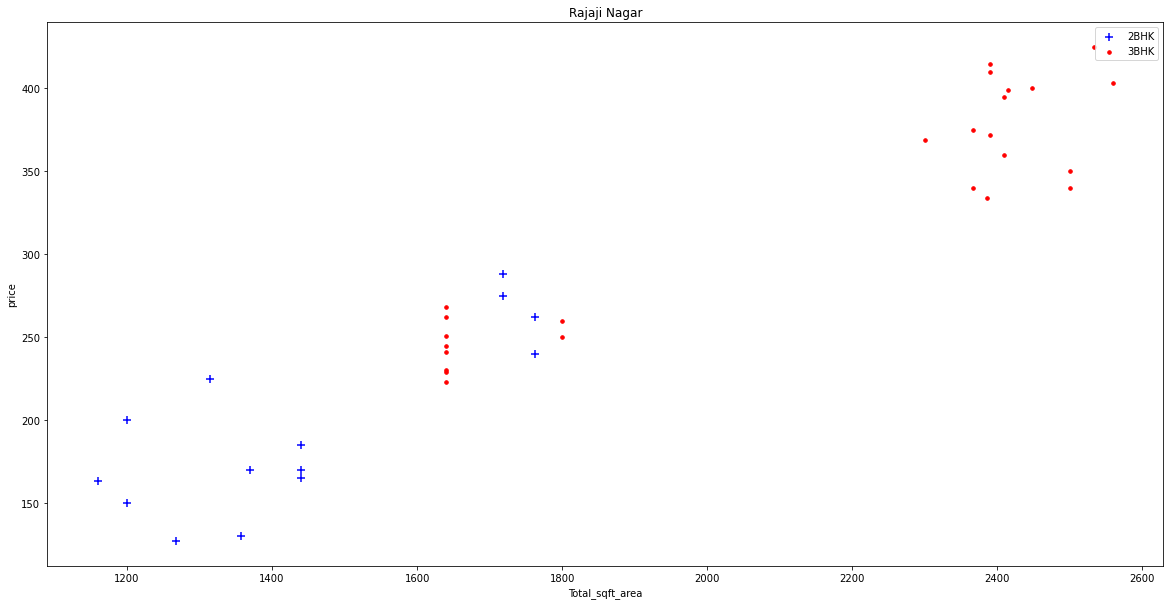

In [112]:
plot_scatter_chart(df8, "Rajaji Nagar") 

In [ ]:
#now explore "Bathroom" feature

In [113]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
#so here 16 bathroom are availble to a single appartment and that can be error
#after discussing to a business partner, he says Bathrooms > BHK + 2 is error

In [115]:
df8[df8.bath> df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [ ]:
#So all above are errors to us

In [116]:
df9 = df8[df8.bath < df8.bhk+2]

In [ ]:
#now "size" and "price_per_sqft" columns are going to have any use, so drop them

In [118]:
df10 = df9.drop(['size','price_per_sqft'], axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
#Model building :-

In [ ]:
#Now "location" column contain string value, we have to convert it into interger,
#so we are going to use One Hot Encoding

In [128]:
dummies = pd.get_dummies(df10.location)


In [127]:
df11 = pd.concat([df10, dummies.drop('Other', axis = 1)], axis =1)

df11.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#now there is no use of location column, drop that

In [129]:
df12 = df11.drop('location', axis =1)

In [ ]:
#now create x(independant variable) and y(dependent variable) for model fiiting

In [131]:
x = df12.drop('price', axis = 1)
y = df12.price

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =10)

from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8691914452174425

In [ ]:
#try K-Fold method also

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
arr = cross_val_score(LinearRegression(), x,y, cv=cv)
print(arr)
arr.mean()


[0.85430675 0.84187647 0.84728412 0.85171729 0.87168018]


0.853372960524128

In [ ]:
#now check which algorithm with best parameter is best for this problem

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
            'criterion' : ['mse', 'friedman_mse'],
            'splitter' : ['best', 'random']
            }
        }
    }
    
    scores = []
    
    cv=ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name , 
            'best_score' : gs.best_score_ ,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(x,y)






,model,best_score,best_params
0,linear_regression,0.853373,{'normalize': False}
1,lasso,0.727543,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.694428,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
#here also we found out that LinearRegression is best suited Algorithm

In [ ]:
#predict Function :-

In [164]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] =1
    return lr_clf.predict([X])[0]
predict_price("1st Block Jayanagar", 1630, 2,2)

254.56132747901592

In [ ]:
#now we have to export model to pickle file

In [165]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)


In [ ]:
#as we are predicting home price on basis of location, so we have to locations in json file which later used in python flask server

In [166]:
import json
columns = {
    'data_column' : [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))